### Import required packages

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib as mpl
import scipy.stats as si

### AMAZON stock data import via yahoo finance

In [2]:
tick='AMZN' #I choose Amazon as the underlying stock
start="2020-11-25"
end="2021-11-25"
df = yf.download(tick,start,end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head() #view first 5 row of stock data (data frame)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-25,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790400
2020-11-27,3211.260010,3216.189941,3190.050049,3195.340088,3195.340088,2392900
2020-11-30,3208.479980,3228.389893,3125.550049,3168.040039,3168.040039,4063900
2020-12-01,3188.500000,3248.949951,3157.179932,3220.080078,3220.080078,4537000
2020-12-02,3221.649902,3232.000000,3173.260010,3203.530029,3203.530029,3129300


In [4]:
df.tail() #view last 5 row of data (data frame)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-18,3566.350098,3704.199951,3561.000000,3696.060059,3696.060059,5703500
2021-11-19,3712.689941,3762.149902,3675.719971,3676.570068,3676.570068,4936700
2021-11-22,3676.379883,3713.459961,3567.500000,3572.570068,3572.570068,4842200
2021-11-23,3585.040039,3621.050049,3527.709961,3580.040039,3580.040039,3690200
2021-11-24,3562.669922,3613.639893,3536.850098,3580.409912,3580.409912,2328000


### Describe Closing Price Data and Draw AMZN Price Graph

In [5]:
df=df['Adj Close'] #df now become a data series
df.describe().round(2) #data statistics

count     252.00
mean     3320.64
std       162.65
min      2951.95
25%      3202.72
50%      3305.39
75%      3433.48
max      3731.41
Name: Adj Close, dtype: float64

In [6]:
Price = df[-1] #last entry of data - last price
print('The spot price is', round(Price,0))

The spot price is 3580.0


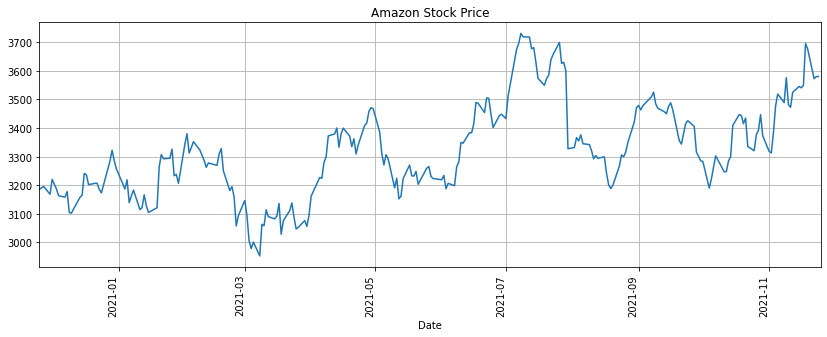

In [7]:
df.plot(label=tick, figsize=(14, 5))
plt.xlabel('Date')
plt.title('Amazon Stock Price')
plt.xticks(rotation=90)
plt.xlim('2020-11-25','2021-11-25')
plt.grid()

### Calculate logarithmic (log) returns

Log return is one of the best option to calculate the changes in a time series over time.

In [8]:
ret=np.log(df/df.shift(1)) #calculate log return
data=pd.concat([df,ret], axis=1) #combine two series and crate a data frame 
data.columns=['Price', 'Return'] #rename columns
data.dropna(inplace=True) #drop na values
data.tail().round(4)

,Price,Return
Date,,
2021-11-18,3696.0601,0.0406
2021-11-19,3676.5701,-0.0053
2021-11-22,3572.5701,-0.0287
2021-11-23,3580.0400,0.0021
2021-11-24,3580.4099,0.0001


### Annualised Volatility

In [9]:
vol = np.sqrt(len(df)) * ret.std()
print('The annualised volatility is', round(vol*100,0), '%')

The annualised volatility is 24.0 %


### Rolling Statistics

The moving average is an important indicator used as a trend follower and is frequently used in technical analysis. Moving averages lagging the current direction rather than giving a direction on where prices will go. It is delayed as it is an indicator based on past prices.

In [10]:
w=10    # 10 days moving average is used to get more significant results. 
data['min'] = data['Price'].rolling(w).min()
data['max'] = data['Price'].rolling(w).max()
data['std'] = data['Price'].rolling(w).std()
data['mean'] = data['Price'].rolling(w).mean()
data['median'] = data['Price'].rolling(w).median()
data['ewma'] = data['Price'].ewm(halflife=0.5, min_periods=14).mean()
data.dropna().head().round(4)

,Price,Return,min,max,std,mean,median,ewma
Date,,,,,,,,
2020-12-16,3240.9600,0.0237,3101.49,3240.96,42.1094,3156.976,3160.2900,3220.8182
2020-12-17,3236.0801,-0.0015,3101.49,3240.96,48.4051,3161.911,3160.2900,3232.2646
2020-12-18,3201.6499,-0.0107,3101.49,3240.96,50.0151,3165.818,3161.5601,3209.3036
2020-12-21,3206.1799,0.0014,3101.49,3240.96,51.4775,3170.636,3171.2051,3206.9608
2020-12-22,3206.5200,0.0001,3101.49,3240.96,52.7124,3173.559,3183.3850,3206.6302


EWMA- The exponentially weighted moving average, also known as riskmetrics volatility, is a simple but useful dynamic volatility model. It shows the weighted average of the past volatility and the most recent return according to the selected lambda parameter.

### Price & Return Changes

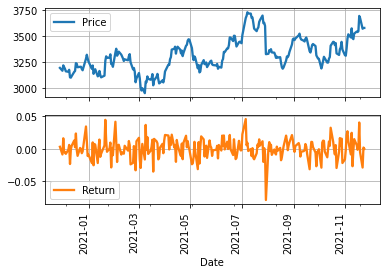

In [11]:
data[['Price','Return']].plot(subplots=True, lw=2.3, grid=True)
plt.xticks(rotation=90)
plt.show()

### Cumulative Returns

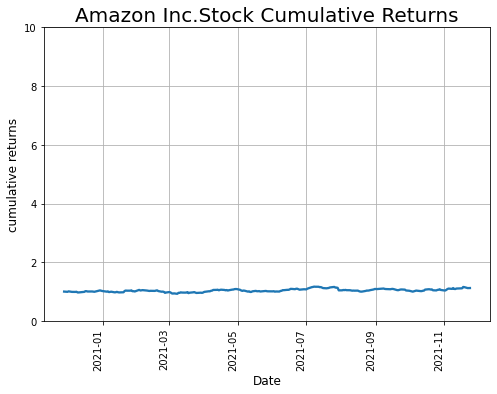

In [12]:
data['Return'].cumsum().apply(np.exp).plot(figsize=(8, 6), lw=2.3)
plt.grid(True)
plt.xticks(rotation=90)
plt.xlabel('Date',fontsize=12)
plt.title('Amazon Inc.Stock Cumulative Returns', fontsize=20)
plt.ylabel('cumulative returns',fontsize=12)
plt.ylim(0,10)
plt.show()

### Distribution of Stock Return

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


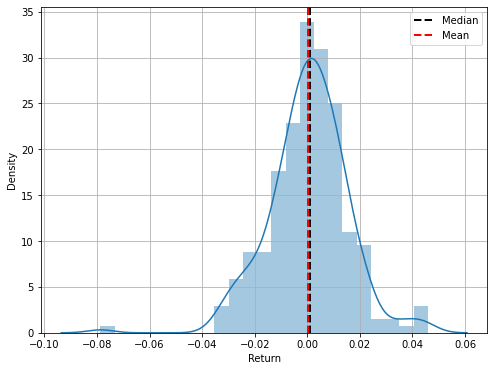

In [13]:
plt.figure(figsize=(8,6))
ax=sns.distplot(data['Return'])
ax.axvline(data['Return'].median(), color='black', ls='--', label='Median',lw=2)
ax.axvline(data['Return'].mean(), color='red', ls='--', label='Mean',lw=2)
plt.legend(loc=0)
plt.grid(True)

In [14]:
data['Return'].describe() #describe the log return statistics

count    251.000000
mean       0.000466
std        0.015012
min       -0.078663
25%       -0.007689
50%        0.001174
75%        0.009847
max        0.045859
Name: Return, dtype: float64

### Simple Moving Average (SMA)

The Simple Moving Average (SMA) is calculated by adding the price of an instrument over a number of time periods and then dividing the sum by the number of time periods. The SMA is basically the average price of the given time period, with equal weighting given to the price of each period.

In [15]:
SMA1=10
SMA2=20
data['SMA1'] = data['Price'].rolling(window=SMA1).mean()
data['SMA2'] = data['Price'].rolling(window=SMA2).mean()
data[['Price', 'SMA1', 'SMA2']].tail()

,Price,SMA1,SMA2
Date,,,
2021-11-18,3696.060059,3539.533984,3456.534009
2021-11-19,3676.570068,3555.291992,3473.585010
2021-11-22,3572.570068,3563.651001,3486.195007
2021-11-23,3580.040039,3564.032007,3496.393506
2021-11-24,3580.409912,3573.867993,3505.789502


10 and 20 days moving averages were used for comparing with the price.

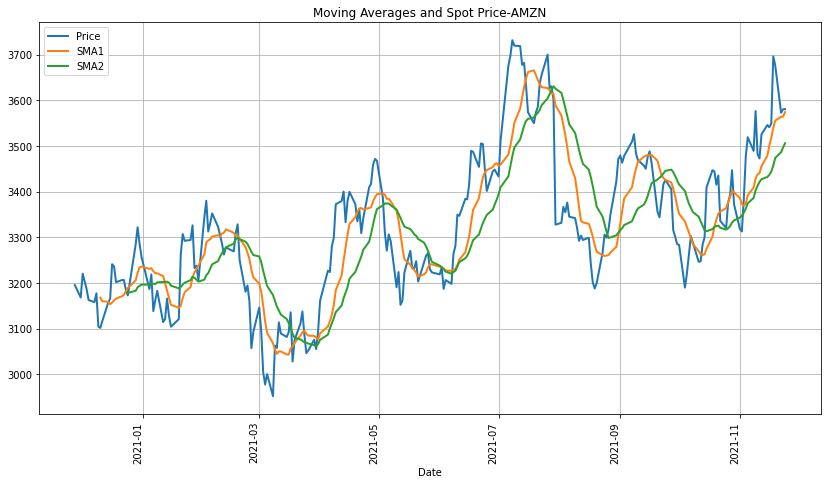

In [16]:
SMA1=10
SMA2=20
data['SMA1'] = data['Price'].rolling(window=SMA1).mean()
data['SMA2'] = data['Price'].rolling(window=SMA2).mean()
data[['Price', 'SMA1', 'SMA2']].plot(figsize=(14,8), grid=True, lw=2)
plt.title('Moving Averages and Spot Price-AMZN')
plt.xticks(rotation=90)
plt.show()

# Option Pricing Models

## Monte Carlo Simulation

Monte Carlo Option Price is a method often used in mathematical finance to calculate the value of an option with multiple sources of uncertainties and random features such as changing interest rates, stock prices or exchange rates, etc. For this product 5000 simulation were used to simulate prices. The max(K-S,0) payoff function was used to value put option.

In [17]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

3 months are selected for time to maturity. Many analysts use the 10 year yield as the "risk free" rate when valuing an individual product. Strike price set as 3800.

In [18]:
T = 0.25                                              # 3 months maturity or time to expiration
r = 0.0164                                     # US 10 Year Treasury Rate (risk free rate) as of November 24,2021
sigma = 0.24                                          #annual volatility 
S0 = 3580                                             #last price of the stock
K = 3800                                              #strike price
q=0                                                   #no dividend payment for Amazon stock

In [31]:
S = mcs_simulation_np(5000) # 5000 simulations for the stock price.More simulations give more accurate value 
S = np.transpose(S)
S

array([[3580.        , 3583.78822945, 3583.513134  , ..., 2992.15703521,
        2991.5567013 , 2996.68351891],
       [3580.        , 3582.19188793, 3588.70364451, ..., 3332.31170055,
        3342.03927358, 3357.85610844],
       [3580.        , 3575.81817357, 3585.16199564, ..., 3110.38643607,
        3112.18108648, 3118.63209863],
       ...,
       [3580.        , 3581.15245286, 3587.64905581, ..., 3402.18673699,
        3405.22686616, 3407.13348887],
       [3580.        , 3586.05393191, 3594.39584344, ..., 4065.01380845,
        4063.91403765, 4066.90659604],
       [3580.        , 3566.59379225, 3569.15005162, ..., 3868.79856118,
        3871.96862128, 3866.48494818]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

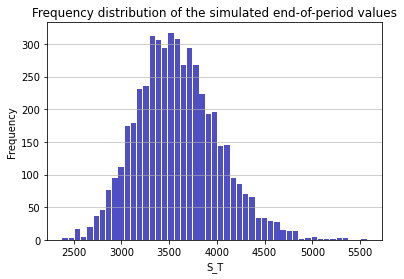

In [32]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-period values')

In [33]:
print('Mean of Simulated Prices is {} and standard deviation is "{}!"'.format(S.mean().round(2), S.std().round(2)))

Mean of Simulated Prices is 3587.77 and standard deviation is "305.4!"


In [34]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 300.29382930949896


## Black-Scholes Model

The BSM model is used to determine the fair prices of stock options based on six variables: volatility, type, underlying stock price, strike price, time, and risk-free rate. It is based on the principle of hedging and focuses on eliminating risks associated with the volatility of underlying assets and stock options.

### European Put Option-AMZN

Non-Dividend Paying AMZN Option, q=0

In [35]:
def euro_put_bsm(S, K, T, r, q, vol):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield(Here is zero)
    #vol: volatility of underlying asset
 
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    #if payoff == "call":
        
    #option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    #elif payoff == "put":
    option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0,1.0)
    
    return option_value

In [36]:
euro_put_bsm(S0,K,T,r,q,sigma)

296.9101439332853

In [37]:
TX = np.linspace(1/12,1,12) #create 12 values between 1 month and 12 months
cpd = np.zeros((len(TX),1))
for i in range(len(TX)):
    cpd [i] = euro_put_bsm(S0, K, TX[i], r, q, sigma) # for each maturity crate an option value

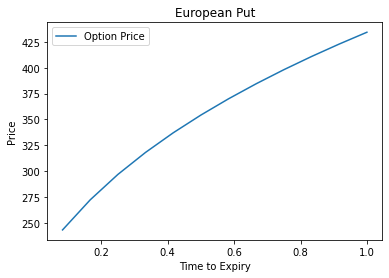

In [38]:
fig = plt.figure()
plt.plot(TX, cpd, '-')
plt.xlabel('Time to Expiry')
plt.ylabel('Price')
plt.title('European Put')
plt.legend(['Option Price'])

In [39]:
SI = np.linspace(2500,4500,13)               #start 2500 and stop 4500 with 13 points 
cp = np.zeros((len(SI),1))
for i in range(len(SI)):
    cp[i] = euro_put_bsm(SI[i], K, T, r, q, sigma)

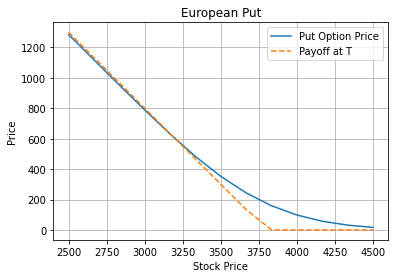

In [40]:
fig = plt.figure()
plt.plot(SI, cp, '-')                    #stock price and option price
plt.plot(SI, np.maximum(K-SI,0), '--')   # stock price and payoff 
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Put')
plt.legend(['Put Option Price','Payoff at T'])
plt.grid()

# Greeks

Greeks were calculated for European put option.

## Delta

Delta is the amount an theoretical option price is expected to move based on a $1 change in the underlying stock.

In [41]:
def delta(S, K, T, r, q, vol):#same parameters with BSM were used
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [42]:
delta(S0, K, T, r, q, sigma)

-0.6564592667348479

In [43]:
SD = np.linspace(2600,4900,52) #create an array for x axis
Delta_Put = np.zeros((len(SD),1))  #initiate delta as len(SD)x1 array 
for i in range(len(SD)):
    Delta_Put [i] = delta(SD[i], K, T, r, q, sigma)

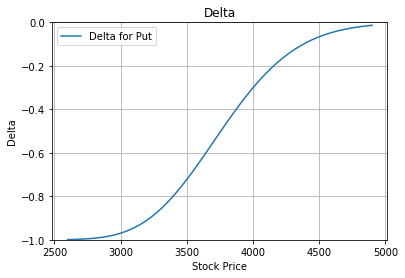

In [44]:
fig = plt.figure()
plt.plot(SD, Delta_Put, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.ylim(-1,0)
plt.legend(['Delta for Put'])
plt.show()

In [45]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [46]:
S = np.linspace(2600, 4900, 51)
T = np.linspace(1/12, 1, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 3800, T[i], 0.0164, 0, 0.24, 'put')

<ipython-input-47-21921ad28f2c>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


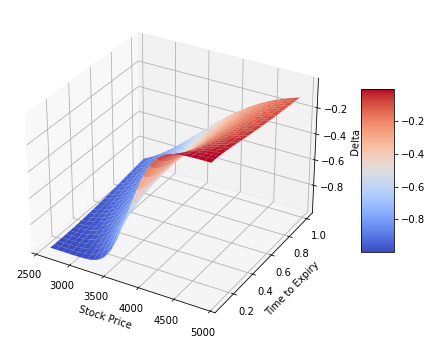

In [47]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [48]:
d = delta(3580, 3800, 0.25, 0.0164, 0, 0.24, 'put')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will decrease $', d.round(4), '.')

The value of Delta is -0.6565 . If the stock price increase 1 dollar, then the value of the option will decrease $ -0.6565 .


## Gamma

Gamma is the rate that delta will change based on a $1 change in the stock price. Options with the highest gamma are the most responsive to changes in the price of the underlying stock.

In [49]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [50]:
gamma(3580, 3800, 0.25, 0.0164, 0, 0.24, 'put')

0.000856270177366781

In [51]:
S = np.linspace(2600,4900,52)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 3800, 0.25, 0.0164, 0, 0.24, 'put')

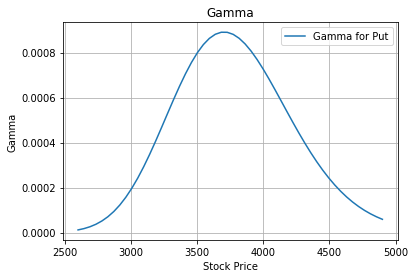

In [52]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

In [53]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [54]:
S = np.linspace(2600, 4900, 51)
T = np.linspace(1/12, 1, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 3800, T[i], 0.0164, 0, 0.24, 'put')

<ipython-input-55-47cb39fb1dbe>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


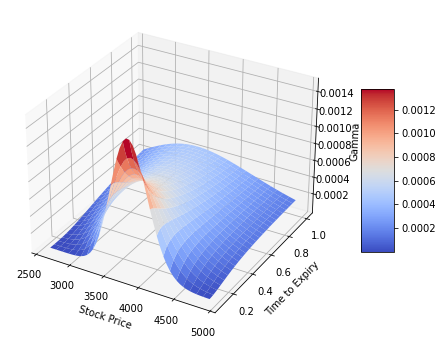

In [55]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Speed

It measures gamma sensitivity to price change. It is third derivative of option price wrt stock price.

In [56]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [57]:
speed(3580, 3800, 0.25, 0.0164, 0, 0.24, 'put')

2.8185448984634153e-07

In [58]:
S = np.linspace(2600,4900,51)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 3800, 0.25, 0.0164, 0, 0.24, 'put')

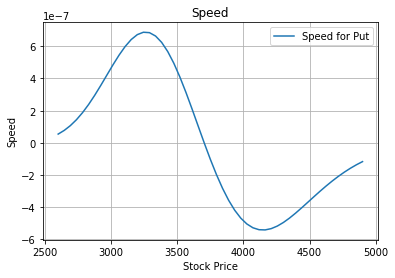

In [59]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Put'])

In [60]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [61]:
S = np.linspace(2600, 4900, 51)
T = np.linspace(0.25, 2, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 3800, T[i], 0.0164, 0, 0.24, 'put')

<ipython-input-62-9bf47fa683fe>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


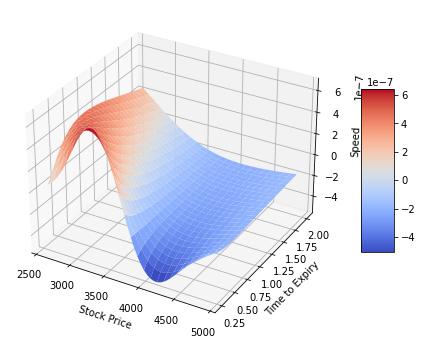

In [62]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Vega

Vega is the Greek that measures an option's sensitivity to implied volatility. It is the change in the option's price for a one-point change in implied volatility.

In [63]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [64]:
vega(3580, 3800, 0.25, 0.0164, 0, 0.24, 'put')

658.4580660722166

In [65]:
vol = np.linspace(0.1,0.9,51)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(3580, 3800, 0.25, 0.0164, 0, vol[i], 'put')

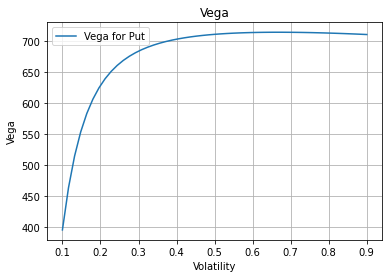

In [66]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Put'])

In [67]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [68]:
S = np.linspace(2600, 4900, 51)
T = np.linspace(1/12, 1, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 3800, T[i], 0.0164, 0, 0.24, 'put')

<ipython-input-69-f68257c8f62c>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


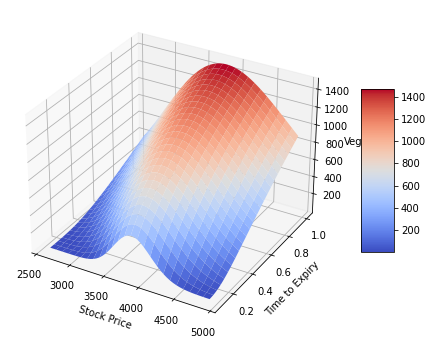

In [69]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [70]:
v = vega(3580, 3800, 0.25, 0.0164, 0, 0.24, 'put')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')

The value of Vega is 658.4581 . If the volatility increases 1%, then the value of the option will increase $ 6.584581 .


## Theta

Theta is the amount the price of calls and puts will decrease for a one-day change in the time to expiration.it’s usually the option seller’s best friend.

In [71]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [72]:
theta(3580, 3800, 0.25, 0.0164, 0, 0.24, 'put')

359.47123454370626

In [73]:
T = np.linspace(1/12,1,51)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    
    Theta_Put [i] = theta(100, 100, T[i], 0.05, 0.03, 0.25, 'put')

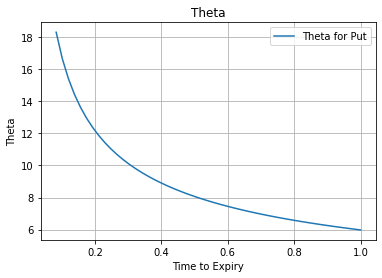

In [74]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

In [75]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [76]:
S = np.linspace(2600, 4900, 51)
T = np.linspace(1/12, 1, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 3800, T[i], 0.0164, 0, 0.24, 'put')

<ipython-input-77-f7a517c5bc2a>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


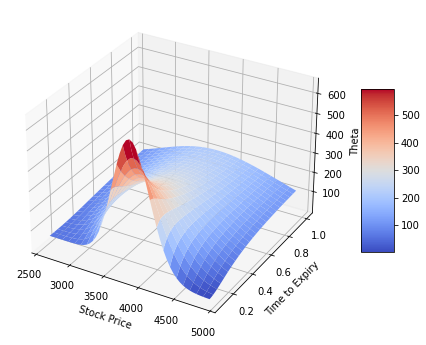

In [77]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Rho

Rho, 𝜌, measures sensitivity to the interest rate.

In [78]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [79]:
rho(3580, 3800, 0.25, 0.0164, 0, 0.24, 'put')

-661.7585797110102

In [80]:
r = np.linspace(0,0.1,11)
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Put [i] = rho(100, 100, 1, r[i], 0.03, 0.25, 'put')

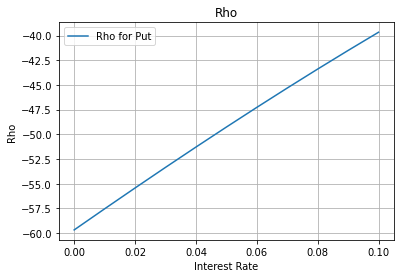

In [81]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])

In [82]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [83]:
S = np.linspace(3000, 5000, 51)
T = np.linspace(1/12, 1, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 3800, T[i], 0.0164, 0, 0.24, 'put')

<ipython-input-84-87610627bdec>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


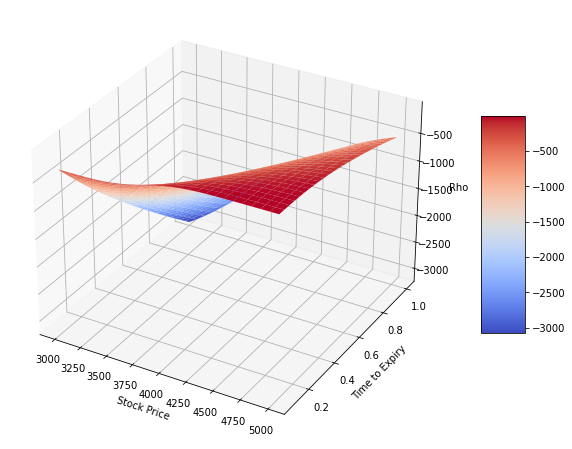

In [84]:
fig = plt.figure(figsize=(14,8))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);